# Prepare test  satellite images 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

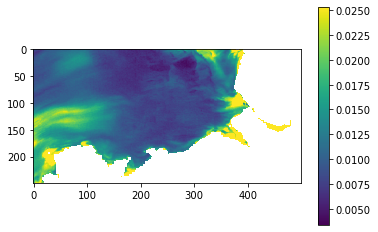

In [16]:
# prepare test dataset
ds = xr.open_dataset('data/S3A_OL_1_EFR____20200506T104005_20200506T104305_20200507T143731_0179_058_051_1980_LN1_O_NT_002.SEN3.nc')

# Restrict to Liverpool Bay
ds = ds.isel(height=slice(3200,3450),width=slice(2200,2700))

# Swir bands not useful for water classification
ds = ds.drop(['Rnir','Rgli','logchl','bbs','Rw865','Rw1020'])

plt.imshow(ds['Rw560'],vmax=ds['Rw560'].quantile(0.95))
plt.colorbar()

#Save to new netcdf file 
ds.to_netcdf('data/S3A_OL_20200506T104005_20200506T104305_20200507T143731_0179_058_051_1980_LN1_O_NT_002.polymer.LivBay.nc')


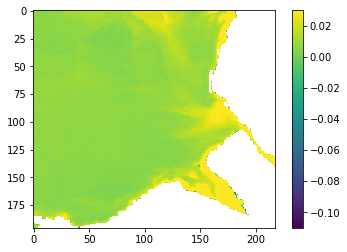

In [34]:

l2 = xr.open_dataset(r'c:\Users\tams00\Documents\temp\ForelUle\subset_2_of_S3A_OL_2_WFR____20200506T104005_20200506T104305_20200507T211159_0179_058_051_1980_MAR_O_NT_002_resampled.nc')
#remove unwanted variables
for var in l2:
    if not var.endswith('reflectance') and not (var in ['latitude','longitude']):
        l2 = l2.drop(var)
        
plt.imshow(l2['Oa06_reflectance'],vmax=l2['Oa06_reflectance'].quantile(0.95))
plt.colorbar()        

l2.to_netcdf('data/S3A_OL_2_WFR____20200506T104005_20200506T104305_20200507T211159_0179_058_051_1980_MAR_O_NT_002.LivBay.nc')

In [33]:
l2['Oa06_reflectance']

<xarray.DataArray 'Oa06_reflectance' (y: 196, x: 218)>
array([[0.005506, 0.005341, 0.004535, ...,      nan,      nan,      nan],
       [0.00556 , 0.004791, 0.006861, ...,      nan,      nan,      nan],
       [0.005176, 0.004736, 0.005304, ...,      nan,      nan,      nan],
       ...,
       [0.00459 , 0.008692, 0.009607, ...,      nan,      nan,      nan],
       [0.004132, 0.005853, 0.009131, ...,      nan,      nan,      nan],
       [0.004645, 0.006568, 0.00838 , ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
    lat      (y, x) float64 53.82 53.82 53.82 53.82 ... 53.2 53.2 53.2 53.2
    lon      (y, x) float64 -3.678 -3.674 -3.67 -3.666 ... -3.023 -3.02 -3.016
Dimensions without coordinates: y, x
Attributes:
    long_name:                  Reflectance for OLCI acquisition band Oa06
    radiation_wavelength:       560.0
    radiation_wavelength_unit:  nm

In [29]:
l2

<xarray.Dataset>
Dimensions:           (x: 218, y: 196)
Coordinates:
    lat               (y, x) float64 ...
    lon               (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables: (12/18)
    Oa01_reflectance  (y, x) float32 ...
    Oa02_reflectance  (y, x) float32 ...
    Oa03_reflectance  (y, x) float32 ...
    Oa04_reflectance  (y, x) float32 ...
    Oa05_reflectance  (y, x) float32 ...
    Oa06_reflectance  (y, x) float32 ...
    ...                ...
    Oa16_reflectance  (y, x) float32 ...
    Oa17_reflectance  (y, x) float32 ...
    Oa18_reflectance  (y, x) float32 ...
    Oa21_reflectance  (y, x) float32 ...
    latitude          (y, x) float64 ...
    longitude         (y, x) float64 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     196:218
    start_date:   06-MAY-2020 10:42:26.095807
    stop_date:    06-MAY-2020 10:42:34.677714